### Greetings Dev!

Hope you are well. Here is the notebook you'd have to run. I have put everything here, so you can just click on `Run All` and it'll be good to go.

!!!Remember to change your path here depending on where you put the cloned repos love!!!

In [1]:
import sys
sys.path.append("/home/ace07/Documents/GitHub/QMPRS")
sys.path.append("/home/ace07/Documents/GitHub/QICKIT")

Below are all the imports.

In [2]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [30]:
from qickit.circuit import Circuit, PennylaneCircuit
from qickit.primitives import Ket

from qmprs.mps import MPS
from qmprs.synthesis.mps_encoding import Sequential

Define the encoder.

In [4]:
sequential_encoder = Sequential(PennylaneCircuit)

Some utilities.

In [5]:
def generate_random_state(num_qubits: int) -> NDArray[np.complex128]:
    data = np.random.rand(2**num_qubits) + 1j * np.random.rand(2**num_qubits)
    data /= np.linalg.norm(data)
    return data

def encode_state(state: NDArray[np.complex128],
                 num_layers: int,
                 bond_dimension: int) -> tuple[Circuit, float, NDArray[np.complex128]]:
    mps = MPS(statevector=state, bond_dimension=bond_dimension)

    circuit = sequential_encoder.prepare_mps(mps, num_layers=num_layers)
    statevector = circuit.get_statevector()

    fidelity = abs(np.dot(state.conj(), statevector))

    return circuit, fidelity, statevector

We're gonna also use the glorious Ghost image for some visual testing teehee.

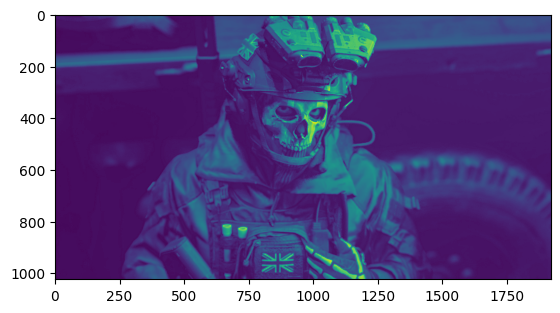

In [47]:
from PIL import Image as Img

# Load the image
ghost = Img.open('datasets/Ghost.jpg')

# Convert the image to grayscale
ghost = ghost.convert('L')

ghost = np.array(ghost)
ghost.resize(1024, 1920)
plt.imshow(ghost)

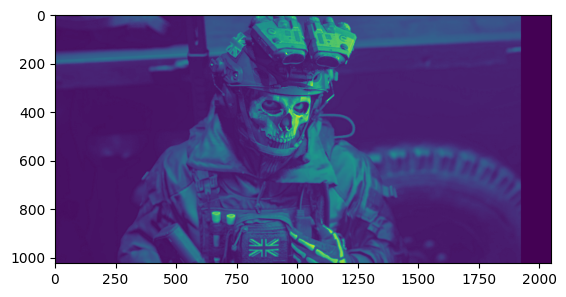

In [48]:
zeros = np.zeros((2**10, 2**11))

zeros[:1024, :1920] = np.array(ghost)
plt.imshow(zeros)

In [49]:
ghost_data = Ket(zeros.flatten())

/tmp/ipykernel_343784/2201498596.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  ghost_result = ghost_data.data.astype(float)


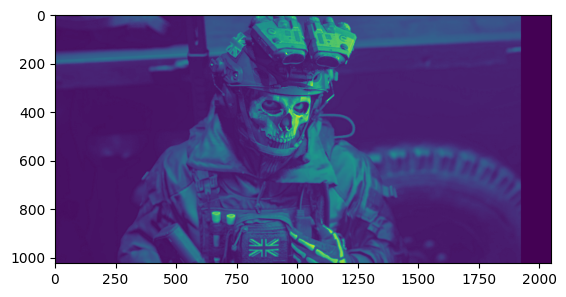

In [50]:
ghost_result = ghost_data.data.astype(float)
plt.imshow(ghost_result.reshape(2**10, 2**11))

### Scenario 1 : Testing the fidelity of the encoding with low bond dimension and increasing number of layers

#### Test case 1

In [ ]:
num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

state = generate_random_state(10)
depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity, _ = encode_state(state, layer, 32)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

In [ ]:
plt.plot(num_layers, fidelities)
plt.xlabel("Number of Layers")
plt.ylabel("Fidelity")
plt.show()

In [ ]:
plt.plot(num_layers, depths)
plt.xlabel("Number of Layers")
plt.ylabel("Depth")
plt.show()

#### Test case 2

In [ ]:
num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

state = generate_random_state(15)
depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity, _ = encode_state(state, layer, 32)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

In [ ]:
plt.plot(num_layers, fidelities)
plt.xlabel("Number of Layers")
plt.ylabel("Fidelity")
plt.show()

In [ ]:
plt.plot(num_layers, depths)
plt.xlabel("Number of Layers")
plt.ylabel("Depth")
plt.show()

#### Test case 3

In [ ]:
num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

state = generate_random_state(22)
depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity, _ = encode_state(state, layer, 32)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

In [ ]:
plt.plot(num_layers, fidelities)
plt.xlabel("Number of Layers")
plt.ylabel("Fidelity")
plt.show()

In [ ]:
plt.plot(num_layers, depths)
plt.xlabel("Number of Layers")
plt.ylabel("Depth")
plt.show()

#### Test case 4

In [ ]:
num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

state = generate_random_state(22)
depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity, _ = encode_state(state, layer, 128)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

In [ ]:
plt.plot(num_layers, fidelities)
plt.xlabel("Number of Layers")
plt.ylabel("Fidelity")
plt.show()

In [ ]:
plt.plot(num_layers, depths)
plt.xlabel("Number of Layers")
plt.ylabel("Depth")
plt.show()

#### Test case 5

In [ ]:
num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

state = ghost_data
depths = []
fidelities = []
results = []

for layer in tqdm(num_layers):
    circuit, fidelity, result = encode_state(state, layer, 128)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())
    results.append(result.astype(float))

In [ ]:
plt.plot(num_layers, fidelities)
plt.xlabel("Number of Layers")
plt.ylabel("Fidelity")
plt.show()

In [ ]:
plt.plot(num_layers, depths)
plt.xlabel("Number of Layers")
plt.ylabel("Depth")
plt.show()

In [ ]:
for i in range(12):
    plt.imshow(results[i].reshape(2**10, 2**11))
    plt.show()

#### Test case 6

In [ ]:
num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

state = ghost_data
depths = []
fidelities = []
results = []

for layer in tqdm(num_layers):
    circuit, fidelity, result = encode_state(state, layer, 256)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())
    results.append(result.astype(float))

In [ ]:
plt.plot(num_layers, fidelities)
plt.xlabel("Number of Layers")
plt.ylabel("Fidelity")
plt.show()

In [ ]:
plt.plot(num_layers, depths)
plt.xlabel("Number of Layers")
plt.ylabel("Depth")
plt.show()

In [ ]:
for i in range(12):
    plt.imshow(results[i].reshape(2**10, 2**11))
    plt.show()

#### Test case 7

In [ ]:
num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

state = ghost_data
depths = []
fidelities = []
results = []

for layer in tqdm(num_layers):
    circuit, fidelity, result = encode_state(state, layer, 512)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())
    results.append(result.astype(float))

In [ ]:
plt.plot(num_layers, fidelities)
plt.xlabel("Number of Layers")
plt.ylabel("Fidelity")
plt.show()

In [ ]:
plt.plot(num_layers, depths)
plt.xlabel("Number of Layers")
plt.ylabel("Depth")
plt.show()

In [ ]:
for i in range(12):
    plt.imshow(results[i].reshape(2**10, 2**11))
    plt.show()

#### Test case 8

In [ ]:
num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

state = ghost_data
depths = []
fidelities = []
results = []

for layer in tqdm(num_layers):
    circuit, fidelity, result = encode_state(state, layer, 1024)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())
    results.append(result.astype(float))

In [ ]:
plt.plot(num_layers, fidelities)
plt.xlabel("Number of Layers")
plt.ylabel("Fidelity")
plt.show()

In [ ]:
plt.plot(num_layers, depths)
plt.xlabel("Number of Layers")
plt.ylabel("Depth")
plt.show()

In [ ]:
for i in range(12):
    plt.imshow(results[i].reshape(2**10, 2**11))
    plt.show()

#### Test case 9

In [ ]:
num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

state = ghost_data
depths = []
fidelities = []
results = []

for layer in tqdm(num_layers):
    circuit, fidelity, result = encode_state(state, layer, 2048)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())
    results.append(result.astype(float))

In [ ]:
plt.plot(num_layers, fidelities)
plt.xlabel("Number of Layers")
plt.ylabel("Fidelity")
plt.show()

In [ ]:
plt.plot(num_layers, depths)
plt.xlabel("Number of Layers")
plt.ylabel("Depth")
plt.show()

In [ ]:
for i in range(12):
    plt.imshow(results[i].reshape(2**10, 2**11))
    plt.show()

### Scenario 2 : Testing the fidelity of the encoding with constant number of layers and bond dimension with increasing state size

#### Test case 1

In [ ]:
num_qubits = [5, 7, 9, 11, 13, 15, 17, 19, 21]

fidelities = []

for num_qubit in num_qubits:
    state = generate_random_state(num_qubit)
    circuit, fidelity, _ = encode_state(state, layer, 256)
    fidelities.append(fidelity)

In [ ]:
plt.plot(num_qubits, fidelities)
plt.xlabel("Number of Qubits")
plt.ylabel("Fidelity")
plt.show()

#### Test case 2

In [ ]:
num_qubits = [5, 7, 9, 11, 13, 15, 17, 19, 21]

fidelities = []

for num_qubit in num_qubits:
    state = generate_random_state(num_qubit)
    circuit, fidelity, _ = encode_state(state, layer, 512)
    fidelities.append(fidelity)

In [ ]:
plt.plot(num_qubits, fidelities)
plt.xlabel("Number of Qubits")
plt.ylabel("Fidelity")
plt.show()

#### Test case 3

In [ ]:
num_qubits = [5, 7, 9, 11, 13, 15, 17, 19, 21]

fidelities = []

for num_qubit in num_qubits:
    state = generate_random_state(num_qubit)
    circuit, fidelity, _ = encode_state(state, layer, 1024)
    fidelities.append(fidelity)

In [ ]:
plt.plot(num_qubits, fidelities)
plt.xlabel("Number of Qubits")
plt.ylabel("Fidelity")
plt.show()